In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
t0 = time.time()

X_train = np.loadtxt('C:\\Users\\dkakkad\\Desktop\\CMU\\Fall21\\ML AI\\Project\\UCI HAR Dataset\\UCI HAR Dataset\\train\\X_train.txt')
Y_train = np.loadtxt('C:\\Users\\dkakkad\\Desktop\\CMU\\Fall21\\ML AI\\Project\\UCI HAR Dataset\\UCI HAR Dataset\\train\\y_train.txt')
X_test = np.loadtxt('C:\\Users\\dkakkad\\Desktop\\CMU\\Fall21\\ML AI\\Project\\UCI HAR Dataset\\UCI HAR Dataset\\test\\X_test.txt')
Y_test = np.loadtxt('C:\\Users\\dkakkad\\Desktop\\CMU\\Fall21\\ML AI\\Project\\UCI HAR Dataset\\UCI HAR Dataset\\test\\y_test.txt')

print(X_train.shape)
print(X_test.shape)

X = np.vstack((X_train, X_test))

print(X.shape)

Y = np.concatenate((Y_train, Y_test))

print(Y_train.shape)
print(Y_test.shape)
print(Y.shape)


(7352, 561)
(2947, 561)
(10299, 561)
(7352,)
(2947,)
(10299,)


In [3]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=4)
# create model
model = LogisticRegression(multi_class='ovr', solver='liblinear')
# evaluate model
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv)

#print(scores*100)

print(f"The accuracy is {np.mean(scores)*100:1.3f}% with a standard deviation of {np.std(scores):1.3f}")

The accuracy is 95.864% with a standard deviation of 0.016


In [4]:
t1 = time.time()

print(f"The time taken to complete the model is {t1 - t0:1.2f}s")

The time taken to complete the model is 55.39s


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10299 samples in 0.010s...
[t-SNE] Computed neighbors for 10299 samples in 5.239s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.305718
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.196587
[t-SNE] KL 

[Text(0.5, 1.0, 'Data after t-SNE')]

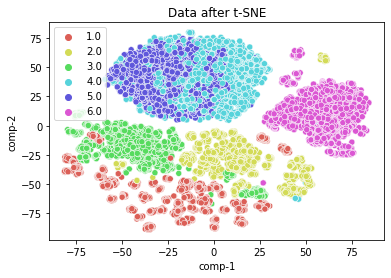

In [15]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, verbose=1, random_state=1)
z = tsne.fit_transform(X) 

df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df).set(title="Data after t-SNE") 


In [6]:
start = time.time()
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X) 

df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

print(z.shape)

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats = 10)
# create model
model = LogisticRegression(multi_class='ovr', solver='liblinear')
# evaluate model
scores = cross_val_score(model, z, Y, scoring='accuracy', cv=cv)

#print(scores*100)
end = time.time()
print(f"The accuracy is {np.mean(scores)*100:1.3f}% with a standard deviation of {np.std(scores):1.3f}")

print(end - start)

NameError: name 'TSNE' is not defined

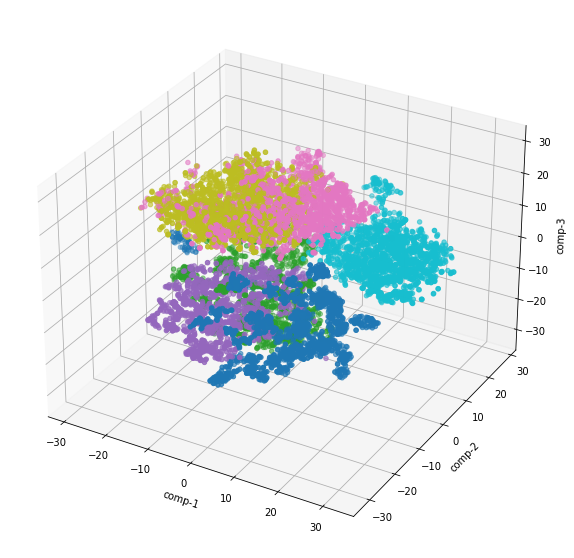

In [86]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=z[:,0], 
    ys=z[:,1], 
    zs=z[:,2], 
    c=Y, 
    cmap='tab10'
)
ax.set_xlabel('comp-1')
ax.set_ylabel('comp-2')
ax.set_zlabel('comp-3')
plt.show()

In [82]:
tsne = TSNE(n_components=3, verbose=1, random_state=123)
z = tsne.fit_transform(X) 

df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["comp-3"] = z[:,2]

print(z.shape)

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats = 10)
# create model
model = LogisticRegression(multi_class='ovr', solver='liblinear')
# evaluate model
scores = cross_val_score(model, z, Y, scoring='accuracy', cv=cv)

#print(scores*100)

print(f"The accuracy is {np.mean(scores)*100:1.3f}% with a standard deviation of {np.std(scores):1.3f}")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10299 samples in 0.010s...
[t-SNE] Computed neighbors for 10299 samples in 5.504s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.305718
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.109375
[t-SNE] KL 